# Gerrymadering & Polarization Study

- Author: Simon Lee (simonlee711@g.ucla.edu)

Dependencies:
- camelot

#### How to calculate Efficiency Gap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

#### DW Nominate Score Analysis

What is Nominate Score (Source Wikipedia):

---

<em>NOMINATE (an acronym for Nominal Three-Step Estimation) is a multidimensional scaling application developed by US political scientists Keith T. Poole and Howard Rosenthal in the early 1980s to analyze preferential and choice data, such as legislative roll-call voting behavior.[1][2] In its most well-known application, members of the US Congress are placed on a two-dimensional map, with politicians who are ideologically similar (i.e. who often vote the same) being close together. One of these two dimensions corresponds to the familiar left–right political spectrum (liberal–conservative in the United States).

As computing capabilities grew, Poole and Rosenthal developed multiple iterations of their NOMINATE procedure: the original D-NOMINATE method, W-NOMINATE, and most recently DW-NOMINATE (for dynamic, weighted NOMINATE). In 2009, Poole and Rosenthal were the first recipients of the Society for Political Methodology's Best Statistical Software Award for their development of NOMINATE.[3] In 2016, the society awarded Poole its Career Achievement Award, stating that "the modern study of the U.S. Congress would be simply unthinkable without NOMINATE legislative roll call voting scores."[4]</em>

In [2]:
# reads in data and gets specific congress and also filters out presidents data 
nominate_score = pd.read_csv('../data/nominate_scores.csv')
print("Before Preprocessing")
display(nominate_score)
nominate_score = nominate_score[nominate_score['chamber'] == 'House'] 
nominate_score = nominate_score[nominate_score['congress'] > 110]
nominate_score = nominate_score[nominate_score['congress'] < 118]

# convert party_code from 200 -> Republican, 100 -> Deomcrat, rest reamins
nominate_score['party_code'] = nominate_score['party_code'].replace([200, 100, 328],
                        ['Republican', 'Democratic', 'Other'])

# reorganize dataframe
nominate_score.index = nominate_score['congress']
nominate_score = nominate_score[['congress', 'chamber', 'district_code', 'state_abbrev', 'party_code', 'bioname', 'nominate_dim1', 'nominate_dim2']]

# Making a start date & end date column. Definitely not the most efficient way to do it but whatever..
conditions = [
    (nominate_score['congress'] == 111),
    (nominate_score['congress'] == 112),
    (nominate_score['congress'] == 113),
    (nominate_score['congress'] == 114),
    (nominate_score['congress'] == 115),
    (nominate_score['congress'] == 116),
    (nominate_score['congress'] == 117)
]
start_values = [2009,2011,2013,2015,2017,2019,2021]
end_values = [2011,2013,2015,2017,2019,2021,2023]

nominate_score['start_year'] = np.select(conditions, start_values)
nominate_score['end_year'] = np.select(conditions, end_values)

# final dataframe
print("After Preprocessing")
nominate_score

Before Preprocessing


,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0.0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2.0,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.75800,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1.0,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.77600,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3.0,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.88000,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6.0,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.78300,96.0,11.0,NaN,0.114,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50480,118,Senate,40915,56,0.0,WV,100,NaN,NaN,"MANCHIN, Joe, III",...,NaN,-0.060,0.409,-15.58810,0.81886,78.0,7.0,NaN,-0.134,0.424
50481,118,Senate,29940,25,0.0,WI,100,NaN,NaN,"BALDWIN, Tammy",...,NaN,-0.493,-0.134,-4.87620,0.94014,79.0,3.0,NaN,-0.599,0.253
50482,118,Senate,41111,25,0.0,WI,200,NaN,NaN,"JOHNSON, Ron",...,NaN,0.626,-0.148,-9.20443,0.89002,79.0,3.0,NaN,0.656,0.377
50483,118,Senate,20953,68,0.0,WY,200,NaN,NaN,"LUMMIS, Cynthia M.",...,NaN,0.692,-0.353,-10.45930,0.87451,78.0,5.0,NaN,0.943,-0.300


After Preprocessing


,congress,chamber,district_code,state_abbrev,party_code,bioname,nominate_dim1,nominate_dim2,start_year,end_year
congress,,,,,,,,,,
111,111,House,1.0,AL,Republican,"BONNER, Jr., Josiah Robins (Jo)",0.367,0.513,2009,2011
111,111,House,3.0,AL,Republican,"ROGERS, Mike Dennis",0.362,0.462,2009,2011
111,111,House,7.0,AL,Democratic,"DAVIS, Artur",-0.270,0.454,2009,2011
111,111,House,2.0,AL,Democratic,"BRIGHT, Bobby Neal, Sr.",0.067,0.671,2009,2011
111,111,House,5.0,AL,Democratic,"GRIFFITH, Parker",-0.045,0.522,2009,2011
...,...,...,...,...,...,...,...,...,...,...
117,117,House,1.0,WI,Republican,"STEIL, Bryan",0.413,0.045,2021,2023
117,117,House,7.0,WI,Republican,"TIFFANY, Thomas P.",0.643,-0.206,2021,2023
117,117,House,5.0,WI,Republican,"FITZGERALD, Scott",0.612,0.233,2021,2023


In [16]:
temp = nominate_score[nominate_score['congress'] == 111]
temp['nominate_dim1'] = temp['nominate_dim1'].abs()

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_35563/112499219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['nominate_dim1'] = temp['nominate_dim1'].abs()


#### What do the dimensions mean

Below I have copied a snippet from Wikipedia about the Nominate Score Dimensions and what they mean:

---

<em>Poole and Rosenthal demonstrate that—despite the many complexities of congressional representation and politics—roll call voting in both the House and the Senate can be organized and explained by no more than two dimensions throughout the sweep of American history. The first dimension (horizontal or x-axis) is the familiar left-right (or liberal-conservative) spectrum on economic matters. The second dimension (vertical or y-axis) picks up attitudes on cross-cutting, salient issues of the day (which include or have included slavery, bimetallism, civil rights, regional, and social/lifestyle issues). Rosenthal and Poole have initially argued that the first dimension refers to socio-economic matters and the second dimension to race-relations.[10] However, the often confusing and residual nature of the second dimension has led to the second dimension being largely ignored by other researchers.[11]

For the most part, congressional voting is uni-dimensional, with most of the variation in voting patterns explained by placement along the liberal-conservative first dimension. While the first dimension of the DW-NOMINATE score is able to predict results at 83% accuracy, the addition of the second dimension only increases accuracy to 85%.[10] Furthermore, the second dimension only provided a significant increase in accuracy for Congresses 1-99. As late as the 1990s, the second dimension was able to measure partisan splits in abortion and gun rights issues. However, a 2017 analysis found that since 1987, the votes of the US Congress had best fit a one-dimensional model, suggesting increasing party polarization after 1987.[12]</em>

---

Takeaway: You can ignore dimension 2

Text(0, 0.5, 'race-relations ideology')

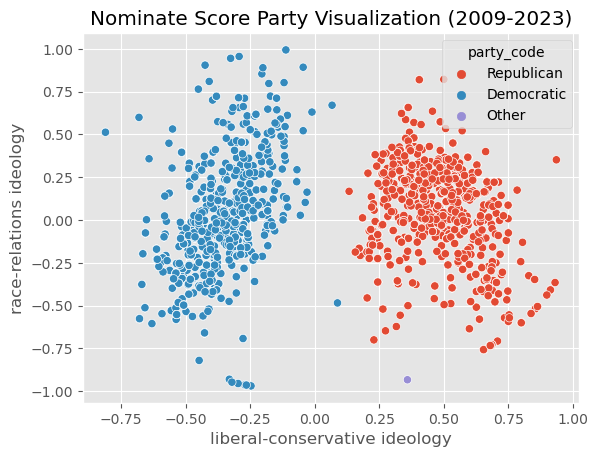

In [17]:
sns.scatterplot(data=nominate_score, x="nominate_dim1", y="nominate_dim2", hue='party_code')
plt.title("Nominate Score Party Visualization (2009-2023)")
plt.xlabel("liberal-conservative ideology")
plt.ylabel("race-relations ideology")

<strong>Fig 1.</strong> Tries to show if there are any outliers or politicians that have opposing views And while we do have a few data points, we can clearly identify two distinct clusrers for deomcrats and republicans aligning with their viewpoints. However the variation among the clusters are spread out indicating that some states are subject to polarisation.

<AxesSubplot:xlabel='party_code', ylabel='nominate_dim1'>

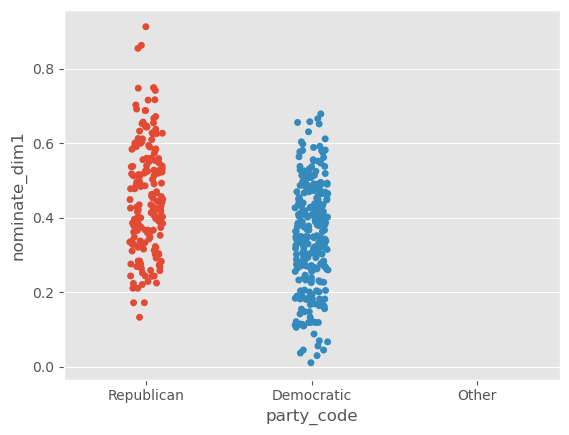

In [18]:
sns.stripplot(data=temp, x='party_code', y='nominate_dim1')

<AxesSubplot:xlabel='party_code', ylabel='nominate_dim1'>

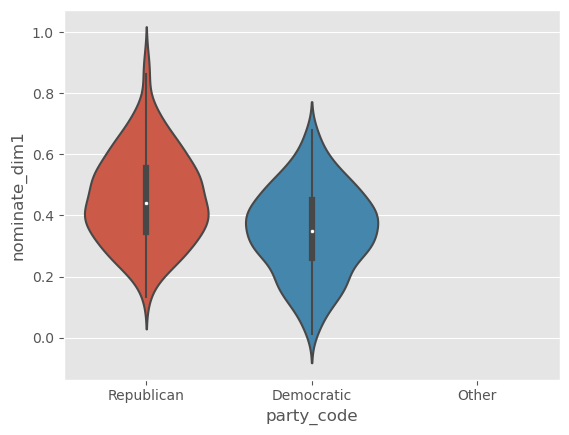

In [19]:
sns.violinplot(data =temp, x = 'party_code', y='nominate_dim1')

#### Efficiency Gap

- PDF Extrcator

In [6]:
import camelot

ModuleNotFoundError: No module named 'camelot'

In [ ]:
test_file = '../data/pdfs/2010election.pdf'

In [ ]:
tables = camelot.read_pdf('../data/pdfs/2010election.pdf')

In [ ]:
def efficiency_gap():
    '''
    A method that calculates the efficiency gap of a given district
    '''
    pass

#### Correlation  Study

- merge the two dataframes
- convert numeric values to nominal
- perform a correlation study among them
- visualize one year one state
- visualize time series of state
- visualize time series of USA (ALl 50 States)